<a href="https://colab.research.google.com/github/LochanaAbeywickrama/Student-Performance-Prediction/blob/main/Student_Performance_Prediction_(Model_Training).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding ##

In [683]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [684]:
# Load the dataset
data = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [685]:
# Display the first few rows of the dataset
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [686]:
# Display the last three raws of the dataset
data.tail(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [687]:
# Display the coloumns names of the dataset
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [688]:
# Display the specific colomn only
data['Attendance']

,Attendance
0,84
1,64
2,98
3,89
4,92
...,...
6602,69
6603,76
6604,90
6605,86


In [689]:
# Get the mean of Previous_Scores colomn
data['Previous_Scores'].mean()

75.07053125472983

In [690]:
# Get initial understanding of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [691]:
data.shape

(6607, 20)

In [692]:
data.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


In [693]:
# Calculate basic summarization statistics
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Data Preprocessing ##

In [694]:
# Check for missing values
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [695]:
# Fill the missing values for categorical terms with mode
categorical_columns = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

data[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']]

<ipython-input-695-3e88a6ac2603>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


,Teacher_Quality,Parental_Education_Level,Distance_from_Home
0,Medium,High School,Near
1,Medium,College,Moderate
2,Medium,Postgraduate,Near
3,Medium,High School,Moderate
4,High,College,Near
...,...,...,...
6602,Medium,High School,Near
6603,High,High School,Near
6604,Medium,Postgraduate,Near
6605,Medium,High School,Far


In [696]:
# Confirm missing values are handled
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [697]:
# Check for duplicate records
data.duplicated().sum()

0

In [698]:
binary_categorical_columns = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']
non_binary_categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']
numerical_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

In [699]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with non binary categorical data
parental_Involvement_dummie = pd.get_dummies(data['Parental_Involvement'], prefix = 'Parental_Involvement')
access_to_Resources_dummie = pd.get_dummies(data['Access_to_Resources'], prefix = 'Access_to_Resources')
motivation_Level_dummie = pd.get_dummies(data['Motivation_Level'], prefix = 'Motivation_Level')
family_Income_dummie = pd.get_dummies(data['Family_Income'], prefix = 'Family_Income')
teacher_Quality_dummie = pd.get_dummies(data['Teacher_Quality'], prefix = 'Teacher_Quality')
peer_Influence_dummie = pd.get_dummies(data['Peer_Influence'], prefix = 'Peer_Influence')
parental_Education_Level_dummie = pd.get_dummies(data['Parental_Education_Level'], prefix = 'Parental_Education_Level')
distance_from_Home_dummie = pd.get_dummies(data['Distance_from_Home'], prefix = 'Distance_from_Home')

# Remove categorical columns (will replace with one-hot encoding)
num_data = data.drop(non_binary_categorical_columns, axis=1)

# Add one-hot encoded columns to numerical features
OH_data = pd.concat([num_data, parental_Involvement_dummie,access_to_Resources_dummie,motivation_Level_dummie,family_Income_dummie,teacher_Quality_dummie,peer_Influence_dummie,parental_Education_Level_dummie,distance_from_Home_dummie], axis=1)


# Ensure all columns have string type
OH_data.columns = OH_data.columns.astype(str)

OH_data.head()

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,...,Teacher_Quality_Medium,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,No,7,73,Yes,0,Public,3,No,...,True,False,False,True,False,True,False,False,False,True
1,19,64,No,8,59,Yes,2,Public,4,No,...,True,True,False,False,True,False,False,False,True,False
2,24,98,Yes,7,91,Yes,2,Public,4,No,...,True,False,True,False,False,False,True,False,False,True
3,29,89,Yes,8,98,Yes,1,Public,4,No,...,True,True,False,False,False,True,False,False,True,False
4,19,92,Yes,6,65,Yes,3,Public,4,No,...,False,False,True,False,True,False,False,False,False,True


In [700]:
# Define a passing threshold
passing_threshold = 70

# Create a new 'Grade' feature based on the 'Exam_Score'
data['Grade'] = data['Exam_Score'].apply(lambda x: 'Pass' if x >= passing_threshold else 'Fail')

data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Grade
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,Fail
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,Fail
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,Pass
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,Pass
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,Pass


In [701]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Copy of the data to apply encodings
encoded_data = data.copy()

# Columns for LabelEncoder (nominal categorical)
label_columns = ['Extracurricular_Activities', 'Internet_Access',
                 'Learning_Disabilities', 'Gender', 'School_Type','Grade']

# Apply LabelEncoder
label_encoders = {}
for col in label_columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    label_encoders[col] = le  # Save the encoder if needed later for inverse transform

# Columns for OrdinalEncoder with specified order
ordinal_columns = {
    'Parental_Involvement': ['Low', 'Medium', 'High', 'Unknown'], # Added 'Unknown'
    'Motivation_Level': ['Low', 'Medium', 'High', 'Unknown'], # Added 'Unknown'
    'Family_Income': ['Low', 'Medium', 'High', 'Unknown'], # Added 'Unknown'
    'Teacher_Quality': ['Low', 'Medium', 'High', 'Unknown'], # Added 'Unknown'
    'Peer_Influence': ['Negative', 'Neutral', 'Positive', 'Unknown'], # Added 'Unknown'
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate', 'Unknown'], # Added 'Unknown'
    'Distance_from_Home': ['Far', 'Moderate', 'Near', 'Unknown'], # Added 'Unknown'
    'Access_to_Resources': ['Low', 'Medium', 'High', 'Unknown'] # Added 'Unknown'
}

# Impute missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
for col in ordinal_columns:
    # Reshape to a 2D array before imputation
    # and flatten back to 1D after transformation.
    encoded_data[col] = imputer.fit_transform(encoded_data[[col]]).ravel()

# Apply OrdinalEncoder
ordinal_encoders = {}
for col, categories in ordinal_columns.items():
    oe = OrdinalEncoder(categories=[categories])
    encoded_data[[col]] = oe.fit_transform(encoded_data[[col]])
    ordinal_encoders[col] = oe  # Save the encoder if needed later for inverse transform

# Display the encoded data
encoded_data.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Grade
0,23,84,0.0,2.0,0,7,73,0.0,1,0,...,1.0,1,2.0,3,0,0.0,2.0,1,67,0
1,19,64,0.0,1.0,0,8,59,0.0,1,2,...,1.0,1,0.0,4,0,1.0,1.0,0,61,0
2,24,98,1.0,1.0,1,7,91,1.0,1,2,...,1.0,1,1.0,4,0,2.0,2.0,1,74,1
3,29,89,0.0,1.0,1,8,98,1.0,1,1,...,1.0,1,0.0,4,0,0.0,1.0,1,71,1
4,19,92,1.0,1.0,1,6,65,1.0,1,3,...,2.0,1,1.0,4,0,1.0,2.0,0,70,1


In [702]:
# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Extract correlation of the target variable (Exam_Score) with other features
correlation_with_target = correlation_matrix['Exam_Score'].sort_values(ascending=False)

# Display the correlations with the target variable
print("Correlation of each feature with Exam_Score:")
print(correlation_with_target)

Correlation of each feature with Exam_Score:
Exam_Score                    1.000000
Grade                         0.698281
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Access_to_Resources           0.169770
Parental_Involvement          0.157114
Tutoring_Sessions             0.156525
Parental_Education_Level      0.103817
Peer_Influence                0.100217
Family_Income                 0.094555
Distance_from_Home            0.088934
Motivation_Level              0.086937
Teacher_Quality               0.076684
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Physical_Activity             0.027824
Gender                       -0.002032
School_Type                  -0.008844
Sleep_Hours                  -0.017022
Learning_Disabilities        -0.085066
Name: Exam_Score, dtype: float64


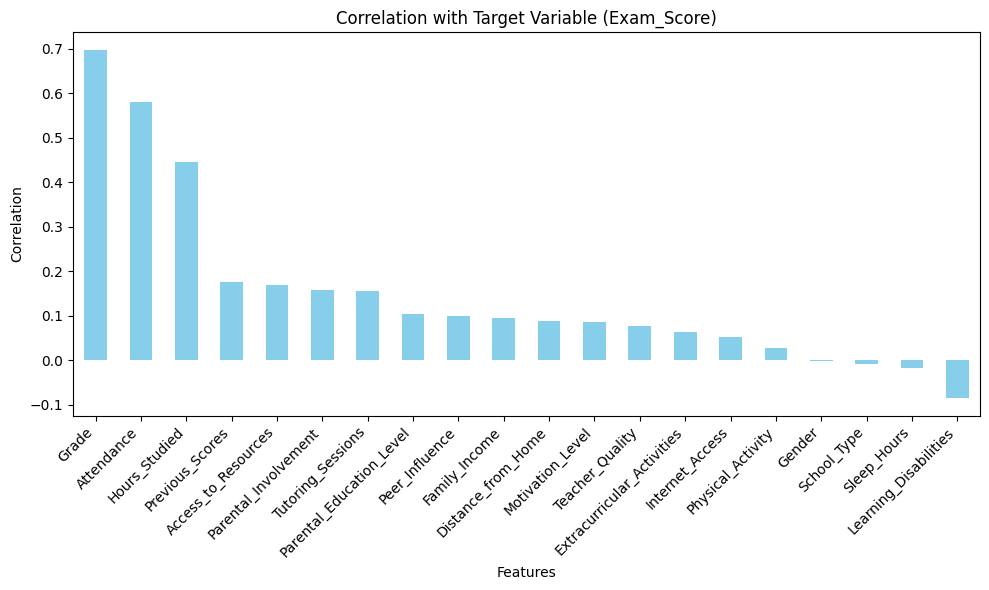

In [703]:
plt.figure(figsize=(10, 6))
correlation_with_target.drop('Exam_Score').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable (Exam_Score)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

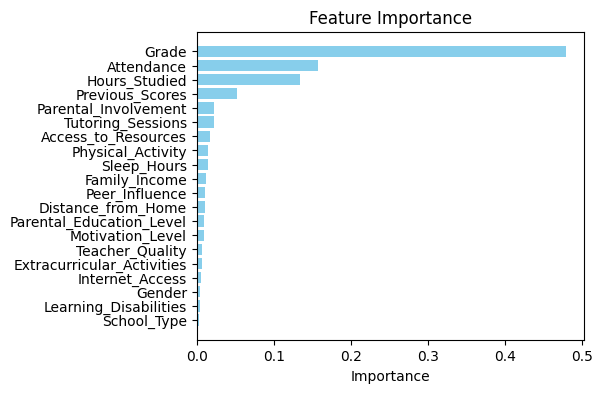

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Grade
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,Fail
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,Fail
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,Pass
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,Pass
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,Pass


In [704]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target variable
X = encoded_data.drop('Exam_Score', axis=1)
y = encoded_data['Exam_Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importance
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(5, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()

data.head()

## Feature Scaling ##

In [705]:
from sklearn.preprocessing import MinMaxScaler

# Normalization
scaler = MinMaxScaler()
encoded_data[encoded_data.columns] = scaler.fit_transform(encoded_data[encoded_data.columns])


encoded_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Grade
0,0.511628,0.600,0.0,1.0,0.0,0.500000,0.46,0.0,1.0,0.000,...,0.5,1.0,1.0,0.500000,0.0,0.0,1.0,1.0,0.260870,0.0
1,0.418605,0.100,0.0,0.5,0.0,0.666667,0.18,0.0,1.0,0.250,...,0.5,1.0,0.0,0.666667,0.0,0.5,0.5,0.0,0.130435,0.0
2,0.534884,0.950,0.5,0.5,1.0,0.500000,0.82,0.5,1.0,0.250,...,0.5,1.0,0.5,0.666667,0.0,1.0,1.0,1.0,0.413043,1.0
3,0.651163,0.725,0.0,0.5,1.0,0.666667,0.96,0.5,1.0,0.125,...,0.5,1.0,0.0,0.666667,0.0,0.0,0.5,1.0,0.347826,1.0
4,0.418605,0.800,0.5,0.5,1.0,0.333333,0.30,0.5,1.0,0.375,...,1.0,1.0,0.5,0.666667,0.0,0.5,1.0,0.0,0.326087,1.0


In [706]:
from sklearn.preprocessing import StandardScaler

# Preprocessing - Scaling
scaler = StandardScaler()

In [707]:
# Features and target variable
X = encoded_data[['Attendance', 'Hours_Studied', 'Previous_Scores','Access_to_Resources','Tutoring_Sessions']]
y = encoded_data['Grade']

In [708]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [709]:
# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [710]:
from sklearn.metrics import classification_report, accuracy_score

## Decision Tree ##

In [711]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 85.7035
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       974
         1.0       0.75      0.69      0.72       348

    accuracy                           0.86      1322
   macro avg       0.82      0.80      0.81      1322
weighted avg       0.85      0.86      0.85      1322



## Random Forest ##

In [712]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 90.1664
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       974
         1.0       0.85      0.76      0.80       348

    accuracy                           0.90      1322
   macro avg       0.88      0.86      0.87      1322
weighted avg       0.90      0.90      0.90      1322



## K-Nearest Neighbors (KNN) ##

In [713]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100

print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")

print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 89.5613
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       974
         1.0       0.83      0.75      0.79       348

    accuracy                           0.90      1322
   macro avg       0.87      0.85      0.86      1322
weighted avg       0.89      0.90      0.89      1322



## Naive Bayes ##

In [714]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 89.9395
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       974
         1.0       0.92      0.68      0.78       348

    accuracy                           0.90      1322
   macro avg       0.91      0.83      0.86      1322
weighted avg       0.90      0.90      0.89      1322



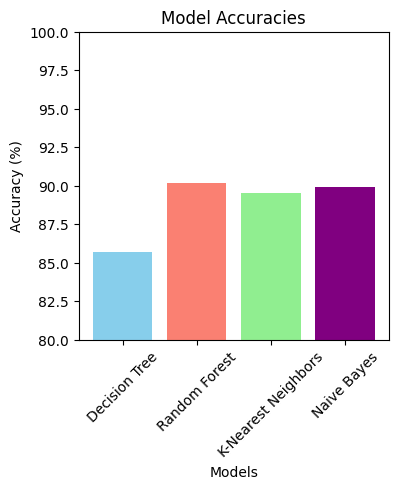

In [715]:
# Model names and their accuracies
models = ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes']
accuracies = [accuracy_dt, accuracy_rf, accuracy_knn, accuracy_nb]

# Plotting the bar chart
plt.figure(figsize=(4, 4))
plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim(80, 100)
plt.xticks(rotation=45)
plt.show()

## Cross-Validation ##

In [716]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation scores for each model
models = {
    'Random Forest': rf,
    'Naive Bayes': nb,
    'Decision Tree': dt
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


Random Forest Cross-Validation Accuracy: 0.8870 ± 0.0069
Naive Bayes Cross-Validation Accuracy: 0.8865 ± 0.0100
Decision Tree Cross-Validation Accuracy: 0.8488 ± 0.0053


## Confusion Matrix ##

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


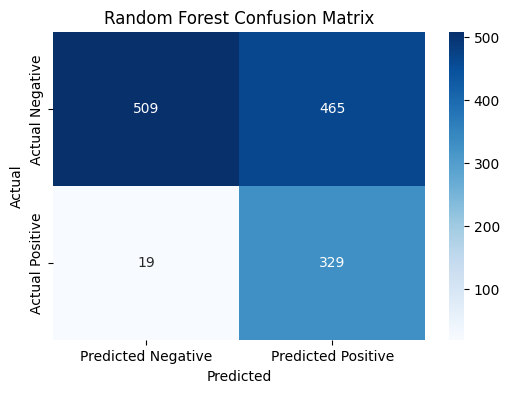

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


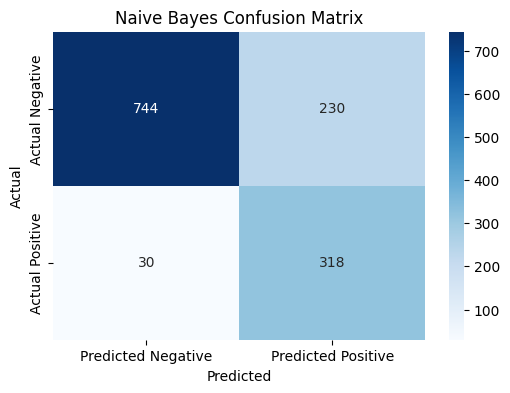

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


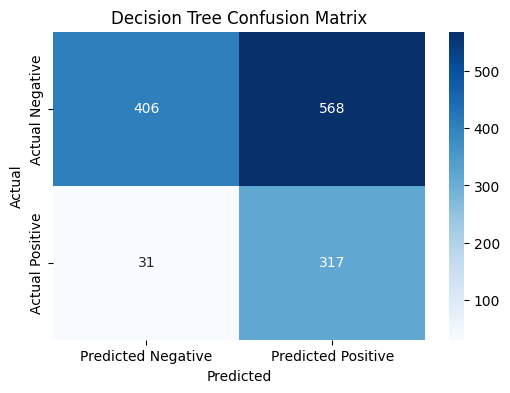

In [717]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Model Selection and Hyperparameter Tuning ##

In [718]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print("Best Random Forest parameters:", rf_grid.best_params_)
print("Best Random Forest accuracy:", rf_grid.best_score_)

# Hyperparameter tuning for Naive Bayes
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
nb = GaussianNB()
nb_grid = GridSearchCV(estimator=nb, param_grid=nb_params, cv=5, n_jobs=-1, scoring='accuracy')
nb_grid.fit(X_train, y_train)
print("Best Naive Bayes parameters:", nb_grid.best_params_)
print("Best Naive Bayes accuracy:", nb_grid.best_score_)

# Hyperparameter tuning for K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, n_jobs=-1, scoring='accuracy')
knn_grid.fit(X_train, y_train)
print("Best KNN parameters:", knn_grid.best_params_)
print("Best KNN accuracy:", knn_grid.best_score_)

Best Random Forest parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest accuracy: 0.8959318826868496
Best Naive Bayes parameters: {'var_smoothing': 1e-09}
Best Naive Bayes accuracy: 0.8864711447492905
Best KNN parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best KNN accuracy: 0.8887417218543046


## Evaluate Model Performance ##

In [720]:
print("RandomForest Accuracy: ", accuracy_score(y_test, y_pred_rf) * 100)
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb) * 100)
print("K-Nearest Neighbors Accuracy: ", accuracy_score(y_test, y_pred_knn) * 100)

RandomForest Accuracy:  90.16641452344932
Naive Bayes Accuracy:  89.93948562783662
K-Nearest Neighbors Accuracy:  89.56127080181543


In [721]:
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))

RandomForest Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       974
         1.0       0.85      0.76      0.80       348

    accuracy                           0.90      1322
   macro avg       0.88      0.86      0.87      1322
weighted avg       0.90      0.90      0.90      1322

Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       974
         1.0       0.92      0.68      0.78       348

    accuracy                           0.90      1322
   macro avg       0.91      0.83      0.86      1322
weighted avg       0.90      0.90      0.89      1322

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       974
         1.0       0.83      0.75      0.79       348

    accuracy                           0.90      1322
   macro av